In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/oral-cancer/Oral Cancer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0771.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0707.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_3093.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0480.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0654.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0620.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_3567.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_1208.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_0761.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_2566.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_1952.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_4835.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_3963.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_3084.jpg
/kaggle/input/oral-cancer/Oral Cancer/oral_scc/oral_scc_1822.jpg
/kaggle/input/oral-cancer

# Data Overview
* Folder Structure: Analyze the directory organization (e.g., class-wise folders or a flat structure).
* Number of Classes: Count the distinct classes or labels.
* Number of Images: Count the total number of images and their distribution across classes

In [3]:
import os
data_dir = "/kaggle/input/oral-cancer/Oral Cancer"
classes = os.listdir(data_dir)
for cls in classes:
    print(f"Class: {cls}, Number of Images: {len(os.listdir(os.path.join(data_dir, cls)))}")

Class: oral_scc, Number of Images: 5001
Class: oral_normal, Number of Images: 5001


# 2. Image Dimensions
* Check for variations in image dimensions and aspect ratios.
* Identify outliers in image size.

In [4]:
from PIL import Image

image_sizes = []
for cls in classes:
    for img_file in os.listdir(os.path.join(data_dir, cls)):
        img = Image.open(os.path.join(data_dir, cls, img_file))
        image_sizes.append(img.size)

print(set(image_sizes))  # Unique image sizes

{(512, 512)}


# 3. Data Distribution
* Plot the number of images per class to identify imbalances.
* Visualize the distribution using a bar chart

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


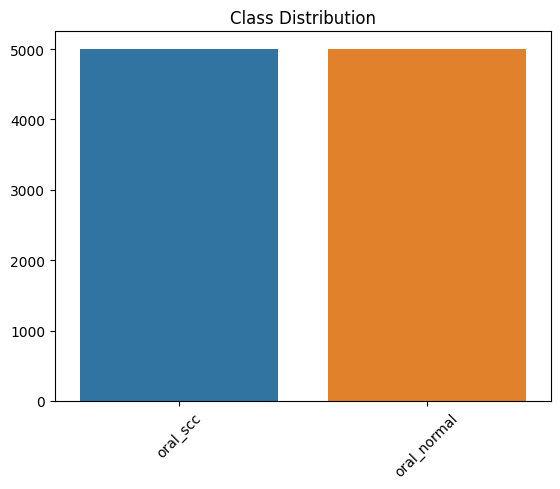

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
sns.barplot(x=classes, y=class_counts)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

# 4. Image Visualization
   
* Display a few random images from each class.
* Check for variations in color, patterns, and noise.

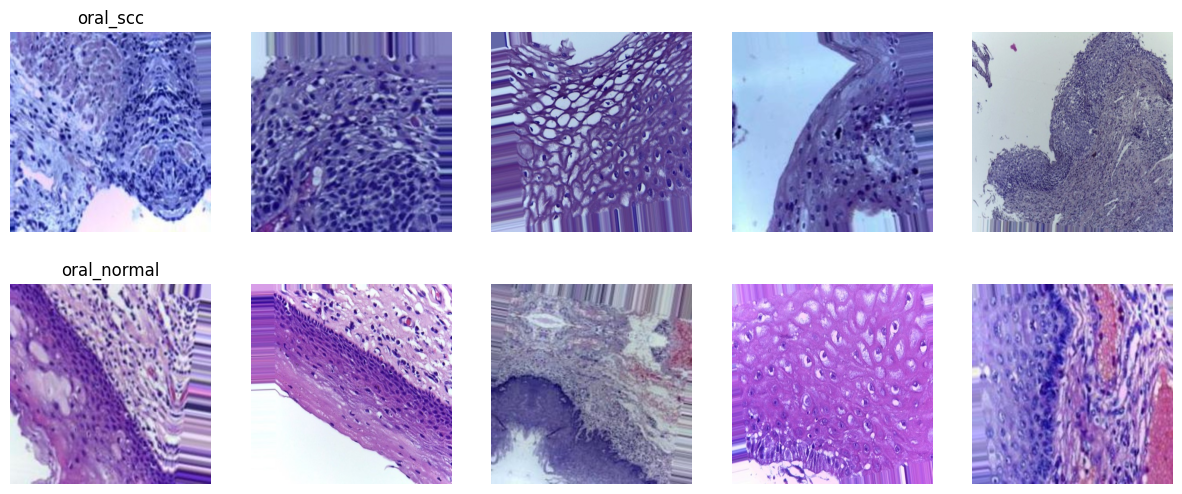

In [7]:
import random
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(classes), 5, figsize=(15, len(classes) * 3))
for i, cls in enumerate(classes):
    class_dir = os.path.join(data_dir, cls)
    for j in range(5):
        img_path = os.path.join(class_dir, random.choice(os.listdir(class_dir)))
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(cls)
plt.show()

# 5. Image Quality

* Inspect images for low resolution, noise, or artifacts.
* Identify corrupted files and handle them.

In [8]:
corrupted_images = []
for cls in classes:
    for img_file in os.listdir(os.path.join(data_dir, cls)):
        try:
            img = Image.open(os.path.join(data_dir, cls, img_file))
            img.verify()  # Check for corruption
        except (IOError, SyntaxError):
            corrupted_images.append(img_file)

print("Corrupted Images:", corrupted_images)

Corrupted Images: []


# 6. Color Analysis
* Check the color distribution (RGB histograms).
* Analyze grayscale versus colored images.

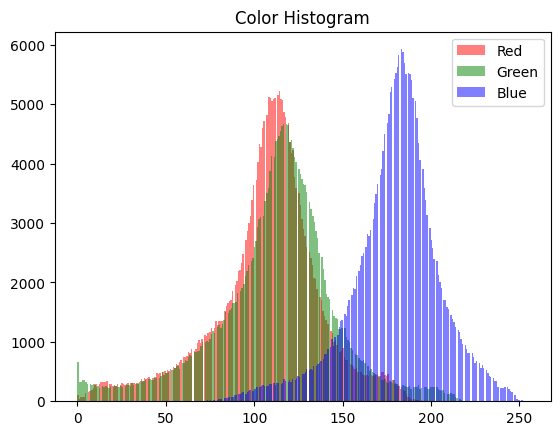

In [11]:
import numpy as np

def plot_color_histogram(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        plt.hist(img_array[..., i].ravel(), bins=256, color=color.lower(), alpha=0.5, label=color)
    plt.legend()
    plt.title("Color Histogram")
    plt.show()

plot_color_histogram("/kaggle/input/oral-cancer/Oral Cancer/oral_normal/oral_normal_0001.jpg")

# 7. Statistical Analysis

* Compute pixel intensity statistics (mean, standard deviation) for images in each class.
* Summarize data across all images.

In [12]:
import torchvision.transforms as transforms

transform = transforms.ToTensor()
stats = {cls: {"mean": [], "std": []} for cls in classes}

for cls in classes:
    for img_file in os.listdir(os.path.join(data_dir, cls)):
        img = Image.open(os.path.join(data_dir, cls, img_file))
        img_tensor = transform(img)
        stats[cls]["mean"].append(img_tensor.mean().item())
        stats[cls]["std"].append(img_tensor.std().item())

for cls, values in stats.items():
    print(f"Class: {cls}, Mean: {sum(values['mean'])/len(values['mean'])}, Std: {sum(values['std'])/len(values['std'])}")

Class: oral_scc, Mean: 0.5794407027026601, Std: 0.19950142616755817
Class: oral_normal, Mean: 0.6187757602562263, Std: 0.19654574947961687


# 8. Data Augmentation Insights
* Simulate augmentations to understand how the images change with transformations.
* Apply transformations like flips, rotations, and color jitter.

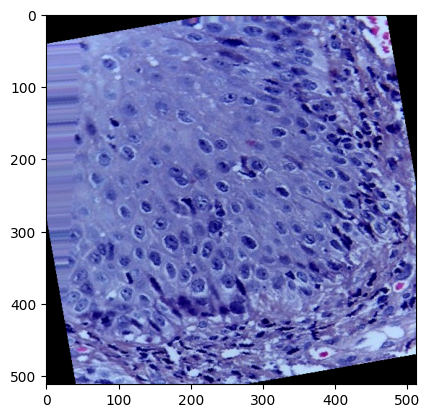

In [14]:
from torchvision import transforms

augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor()
])

img = Image.open("/kaggle/input/oral-cancer/Oral Cancer/oral_normal/oral_normal_0001.jpg")
augmented_img = augmentation(img)

plt.imshow(augmented_img.permute(1, 2, 0))  # Tensor to image
plt.show()

# 9. Feature Engineering Create Dataloader

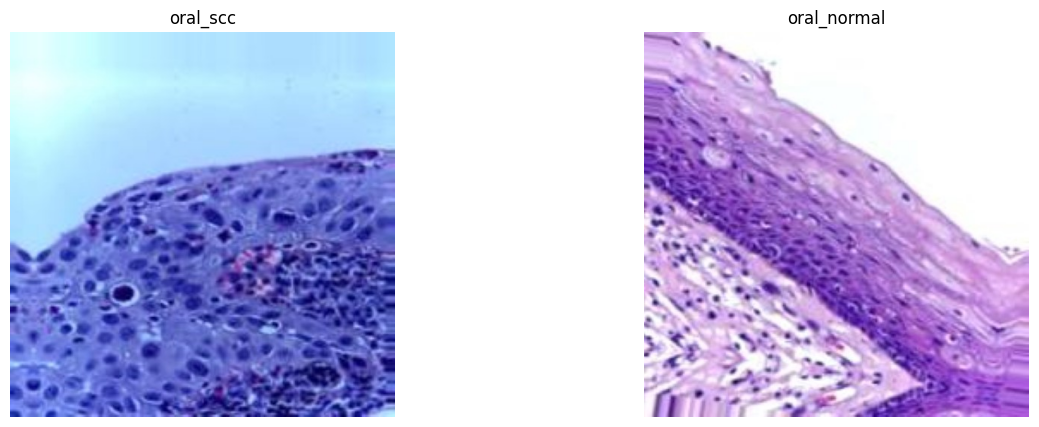

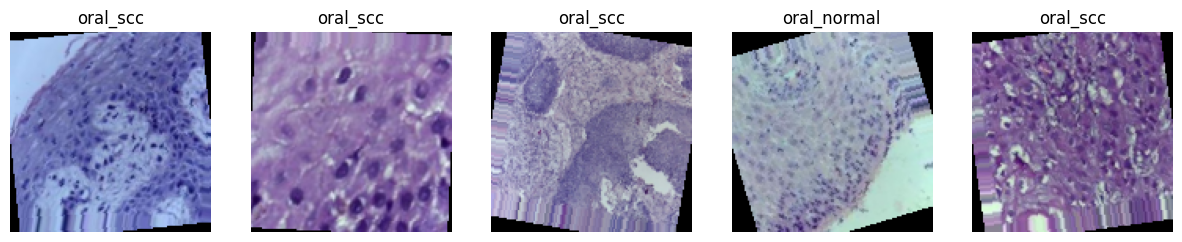

Applying augmentation and transformations


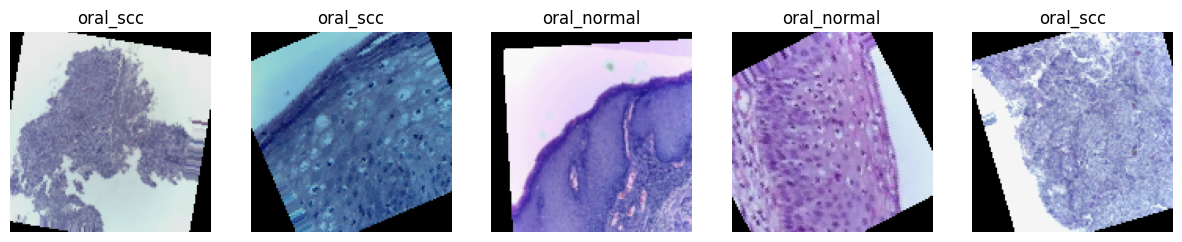

Feature Engineering Results:
Image 1: Mean = 0.1413, Std = 0.5083
Image 2: Mean = 0.3128, Std = 0.5797
Image 3: Mean = 0.3451, Std = 0.6443
Image 4: Mean = 0.0409, Std = 0.4006
Image 5: Mean = 0.4569, Std = 0.4187


In [15]:
import os
import torch
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import random

data_dir = "/kaggle/input/oral-cancer/Oral Cancer"

# Helper function to load and display random images from each folder
def visualize_images(data_dir):
    class_names = os.listdir(data_dir)
    fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        image_file = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_file)

        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Visualization
visualize_images(data_dir)

# Applying feature engineering and image processing
# Define transformations
transform_pipeline = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a uniform size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for augmentation
    transforms.RandomRotation(20),  # Random rotation for augmentation
    transforms.ToTensor(),  # Convert PIL images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the images
])

# Load the dataset
image_dataset = datasets.ImageFolder(root=data_dir, transform=transform_pipeline)
dataloader = torch.utils.data.DataLoader(image_dataset, batch_size=16, shuffle=True)

# Visualize augmented images
def visualize_augmented_images(dataloader):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(1, len(images[:5]), figsize=(15, 5))

    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
        img = img * 0.5 + 0.5  # Unnormalize

        axes[i].imshow(img)
        axes[i].set_title(image_dataset.classes[labels[i]])
        axes[i].axis("off")

    plt.show()

visualize_augmented_images(dataloader)

# Augmentation and Image Processing Techniques
print("Applying augmentation and transformations")
custom_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Affine transformations
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

augmented_dataset = datasets.ImageFolder(root=data_dir, transform=custom_transform)
augmented_loader = torch.utils.data.DataLoader(augmented_dataset, batch_size=16, shuffle=True)

# Visualize more advanced augmentations
visualize_augmented_images(augmented_loader)

# Example Feature Engineering: Extracting pixel intensity mean and variance
def compute_features(loader):
    features = []
    for images, labels in loader:
        for img in images:
            mean = img.mean().item()
            std = img.std().item()
            features.append((mean, std))
    return features

features = compute_features(dataloader)
print("Feature Engineering Results:")
for i, (mean, std) in enumerate(features[:5]):
    print(f"Image {i+1}: Mean = {mean:.4f}, Std = {std:.4f}")

# 10. Advance Augmentation(CutMix and Mosaic Augmetation)

**CutMix**:

* Combines two images and their corresponding labels.
* Increases robustness and improves generalization.

**Mosaic**:

* Combines 4 images into one.
* Introduces spatial diversity to the dataset.

**Use Case**

Both augmentations are commonly used in object detection and classification tasks to increase data diversity and improve model performance. You can integrate these augmentations into your training pipeline to improve results.

# CutMix Augmentation

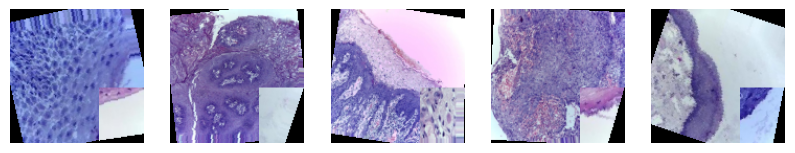

In [18]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import random

# Function to apply CutMix augmentation
def cutmix(images, labels, alpha=1.0):
    """
    Apply CutMix augmentation to a batch of images and labels.

    Parameters:
        images: Tensor - Batch of images (B, C, H, W)
        labels: Tensor - Batch of labels
        alpha: float - Parameter for Beta distribution

    Returns:
        mixed_images: Tensor - Batch of augmented images
        mixed_labels: Tensor - Mixed labels
    """
    lam = np.random.beta(alpha, alpha)  # Sample lambda from Beta distribution
    batch_size, _, H, W = images.size()
    idx = torch.randperm(batch_size)  # Shuffle indices for CutMix

    bbx1 = random.randint(0, W)  # Random x-coordinate
    bby1 = random.randint(0, H)  # Random y-coordinate
    cut_rat = np.sqrt(1.0 - lam)  # CutMix area ratio
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    bbx2 = np.clip(bbx1 + cut_w, 0, W)
    bby2 = np.clip(bby1 + cut_h, 0, H)

    mixed_images = images.clone()
    mixed_images[:, :, bbx1:bbx2, bby1:bby2] = images[idx, :, bbx1:bbx2, bby1:bby2]

    mixed_labels = lam * labels + (1 - lam) * labels[idx]
    return mixed_images, mixed_labels

# Example Usage
# Assuming images is a batch of tensors and labels are one-hot encoded
images, labels = next(iter(dataloader))
cutmix_images, cutmix_labels = cutmix(images, labels)

# Visualize a few CutMix images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(10, 6))
for i in range(5):
    img = cutmix_images[i].permute(1, 2, 0).numpy()
    img = img * 0.5 + 0.5  # Unnormalize
    axes[i].imshow(img)
    axes[i].axis("off")
plt.show()

# Mosaic Augmentation


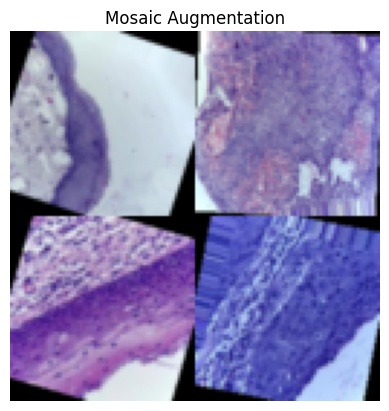

In [19]:
import numpy as np

def mosaic_augmentation(image_batch, label_batch, input_size=128):
    """
    Apply Mosaic augmentation to a batch of images and labels.

    Parameters:
        image_batch: Tensor - Batch of images (B, C, H, W)
        label_batch: Tensor - Batch of labels

    Returns:
        mosaic_image: Tensor - Augmented Mosaic image
        mosaic_label: Tensor - Mixed label
    """
    indices = torch.randperm(len(image_batch))[:4]  # Select 4 random images
    mosaic_images = [image_batch[idx] for idx in indices]
    mosaic_labels = [label_batch[idx] for idx in indices]

    # Resize each image to fit the mosaic grid
    resized_images = [
        transforms.Resize((input_size // 2, input_size // 2))(img) for img in mosaic_images
    ]

    # Create an empty canvas
    mosaic_image = torch.zeros(3, input_size, input_size)

    # Arrange images in a 2x2 grid
    mosaic_image[:, :input_size // 2, :input_size // 2] = resized_images[0]
    mosaic_image[:, :input_size // 2, input_size // 2:] = resized_images[1]
    mosaic_image[:, input_size // 2:, :input_size // 2] = resized_images[2]
    mosaic_image[:, input_size // 2:, input_size // 2:] = resized_images[3]

    # Combine labels (here simply taking the average for demonstration)
    mosaic_label = sum(mosaic_labels) / 4

    return mosaic_image, mosaic_label

# Example Usage
mosaic_img, mosaic_lbl = mosaic_augmentation(images, labels)

# Visualize the Mosaic image
plt.imshow(mosaic_img.permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Unnormalize
plt.title("Mosaic Augmentation")
plt.axis("off")
plt.show()


# Grayscale Conversion
Convert RGB images to grayscale.

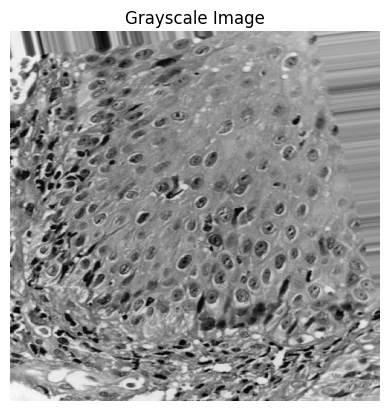

In [21]:
from torchvision.transforms import functional as F

def convert_to_grayscale(image):
    """
    Convert an RGB image to grayscale.
    """
    return F.rgb_to_grayscale(image)

# Example Usage
img = Image.open("/kaggle/input/oral-cancer/Oral Cancer/oral_normal/oral_normal_0001.jpg")
gray_img = convert_to_grayscale(transforms.ToTensor()(img))
plt.imshow(gray_img.squeeze(0), cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Histogram Equalization
Enhance contrast by redistributing pixel intensity values.

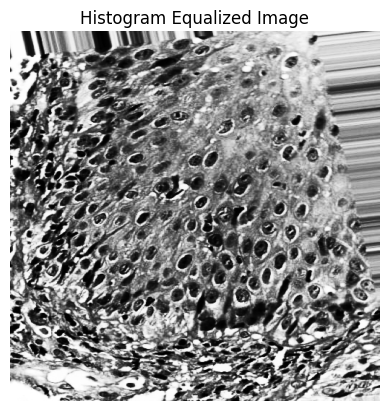

In [22]:
import cv2
import numpy as np

def histogram_equalization(image):
    """
    Perform histogram equalization on a grayscale image.
    """
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    equalized_img = cv2.equalizeHist(img_gray)
    return equalized_img

# Example Usage
img = Image.open("/kaggle/input/oral-cancer/Oral Cancer/oral_normal/oral_normal_0001.jpg")
equalized = histogram_equalization(img)
plt.imshow(equalized, cmap="gray")
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

# Edge Detection
Detect edges using Sobel or Canny edge detectors.

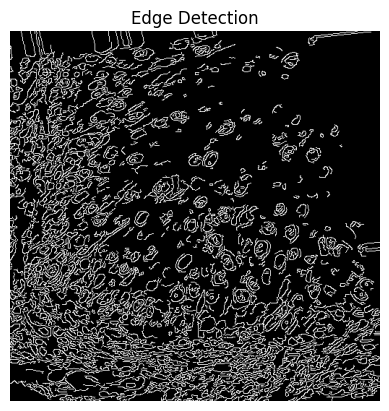

In [23]:
def edge_detection(image, method="canny"):
    """
    Perform edge detection using Canny or Sobel methods.
    """
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    if method == "canny":
        edges = cv2.Canny(img_gray, 100, 200)  # Adjust thresholds as needed
    elif method == "sobel":
        edges_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
        edges_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
        edges = cv2.magnitude(edges_x, edges_y)

    return edges

# Example Usage
edges = edge_detection(img, method="canny")
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

# Gaussian Blur
Reduce noise and smooth the image.

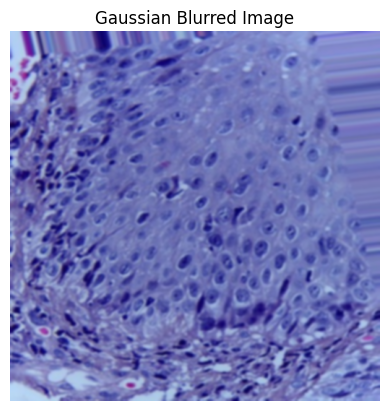

In [24]:
def apply_gaussian_blur(image, kernel_size=5):
    """
    Apply Gaussian blur to an image.
    """
    img_array = np.array(image)
    blurred = cv2.GaussianBlur(img_array, (kernel_size, kernel_size), 0)
    return Image.fromarray(blurred)

# Example Usage
blurred_img = apply_gaussian_blur(img, kernel_size=7)
plt.imshow(blurred_img)
plt.title("Gaussian Blurred Image")
plt.axis("off")
plt.show()


# Binary Thresholding
Convert an image to binary (black and white) using a threshold.

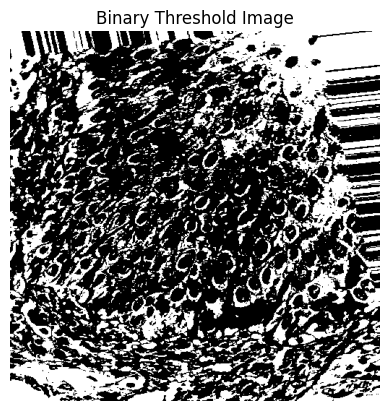

In [25]:
def binary_threshold(image, threshold=128):
    """
    Apply binary thresholding to a grayscale image.
    """
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
    return binary

# Example Usage
binary_img = binary_threshold(img, threshold=128)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Threshold Image")
plt.axis("off")
plt.show()

# Morphological Transformations
Perform operations like erosion, dilation, opening, and closing.

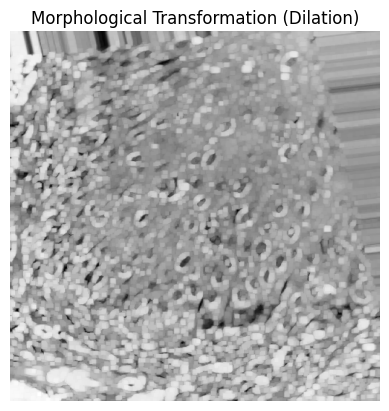

In [26]:
def morphological_transform(image, operation="dilation", kernel_size=5):
    """
    Perform morphological transformations on an image.
    """
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    if operation == "dilation":
        transformed = cv2.dilate(img_gray, kernel, iterations=1)
    elif operation == "erosion":
        transformed = cv2.erode(img_gray, kernel, iterations=1)
    elif operation == "opening":
        transformed = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
    elif operation == "closing":
        transformed = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

    return transformed

# Example Usage
dilated_img = morphological_transform(img, operation="dilation")
plt.imshow(dilated_img, cmap="gray")
plt.title("Morphological Transformation (Dilation)")
plt.axis("off")
plt.show()

# Color Space Conversion
Convert images to different color spaces, e.g., HSV or LAB.

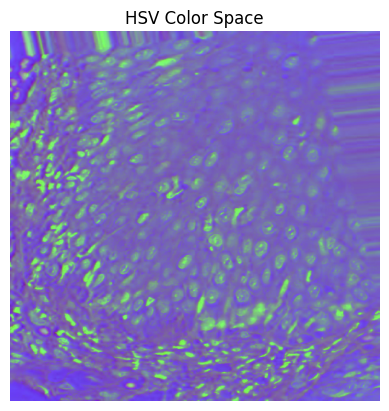

In [27]:
def convert_color_space(image, color_space="HSV"):
    """
    Convert image color space to HSV or LAB.
    """
    img_array = np.array(image)

    if color_space == "HSV":
        converted = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    elif color_space == "LAB":
        converted = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)

    return Image.fromarray(converted)

# Example Usage
hsv_img = convert_color_space(img, color_space="HSV")
plt.imshow(hsv_img)
plt.title("HSV Color Space")
plt.axis("off")
plt.show()

# Contour Detection

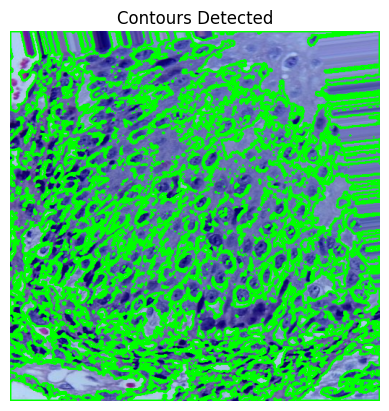

In [28]:
def detect_contours(image):
    """
    Detect contours in a binary image.
    """
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

# Example Usage
contours = detect_contours(img)
img_contour = np.array(img)
cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)
plt.imshow(img_contour)
plt.title("Contours Detected")
plt.axis("off")
plt.show()

# Image Augmentation with Albumentations

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


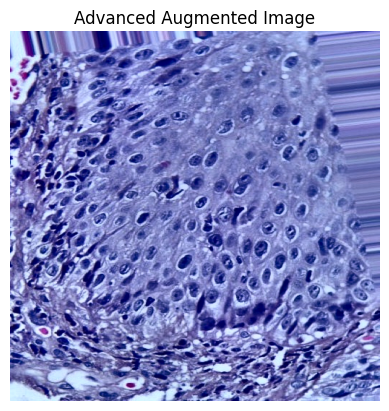

In [29]:
from albumentations import (
    RandomBrightnessContrast, ElasticTransform, CLAHE, Compose
)
from albumentations.pytorch import ToTensorV2

def advanced_augmentation(image):
    """
    Apply advanced augmentations using Albumentations.
    """
    aug = Compose([
        RandomBrightnessContrast(p=0.5),
        ElasticTransform(p=0.5),
        CLAHE(p=0.5),
        ToTensorV2()
    ])
    augmented = aug(image=np.array(image))["image"]
    return augmented

# Example Usage
augmented_img = advanced_augmentation(img)
plt.imshow(augmented_img.permute(1, 2, 0).numpy())
plt.title("Advanced Augmented Image")
plt.axis("off")
plt.show()

# All Image Filters

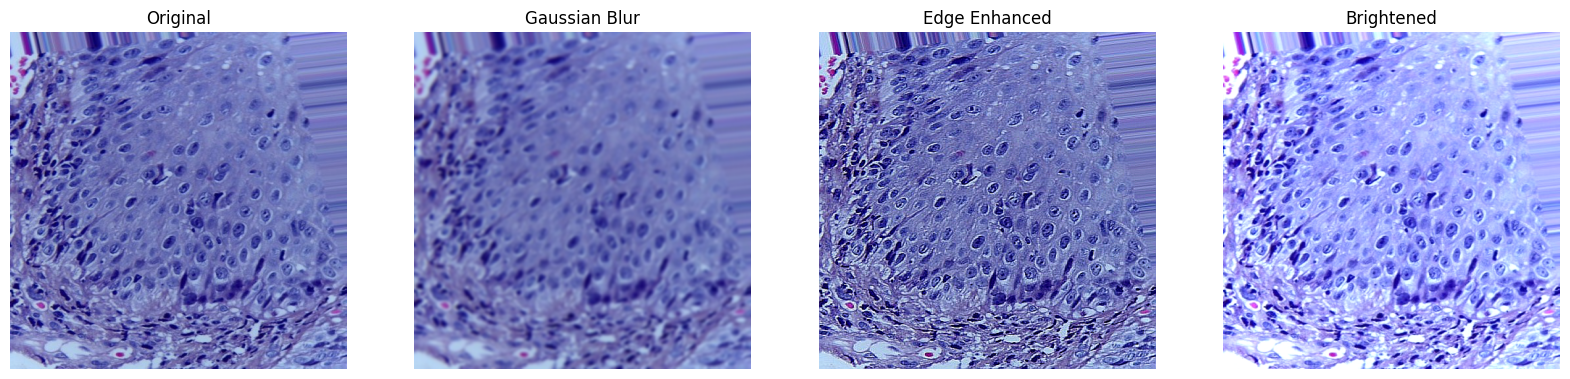

In [30]:
from PIL import Image, ImageFilter, ImageEnhance

# Digital Image Processing Techniques
def apply_image_processing(image_path):
    img = Image.open(image_path)

    # Apply Gaussian Blur
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=2))

    # Apply Edge Enhancement
    edge_enhanced_img = img.filter(ImageFilter.EDGE_ENHANCE)

    # Adjust Brightness
    enhancer = ImageEnhance.Brightness(img)
    bright_img = enhancer.enhance(1.5)

    # Plot original and processed images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(img)
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(blurred_img)
    axes[1].set_title("Gaussian Blur")
    axes[1].axis("off")

    axes[2].imshow(edge_enhanced_img)
    axes[2].set_title("Edge Enhanced")
    axes[2].axis("off")

    axes[3].imshow(bright_img)
    axes[3].set_title("Brightened")
    axes[3].axis("off")

    plt.show()

# Example usage
sample_image_path = os.path.join(data_dir, random.choice(os.listdir(data_dir)), random.choice(os.listdir(data_dir)))
apply_image_processing('/kaggle/input/oral-cancer/Oral Cancer/oral_normal/oral_normal_0001.jpg')

# 12. Summary of Findings

* Data distribution
* Common image issues (e.g., noise, size, corruption)
* Insights into augmentation effectiveness.